## Question 1 : Linear Regression
To check whether you are able to build simple linear regression model from scratch or not.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
!wget --no-check-certificate https://github.com/adigup390/datasets/raw/main/X.npy -O X.npy
!wget --no-check-certificate https://github.com/adigup390/datasets/raw/main/y.npy -O y.npy

--2021-05-27 20:13:35--  https://github.com/adigup390/datasets/raw/main/X.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/adigup390/datasets/main/X.npy [following]
--2021-05-27 20:13:35--  https://raw.githubusercontent.com/adigup390/datasets/main/X.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 528 [application/octet-stream]
Saving to: ‘X.npy’

X.npy               100%[===================>]     528  --.-KB/s    in 0s      

2021-05-27 20:13:36 (32.9 MB/s) - ‘X.npy’ saved [528/528]

--2021-05-27 20:13:36--  https://github.com/adigup390/datasets/raw/main/y.npy
Resolving github.com (github

In [ ]:
def load_data_LR():
  # Implement this function to read the dataset using the path declared in path_X and path_y
  # should return the X and y data
  # use np.load() to load the data google it you will get to know how to do it

  path_X = "X.npy"
  path_y = "y.npy"

  # Write your code here ----------
  X=np.load(path_X)
  y=np.load(path_y)
  #print(X.shape[0])
  # -------------------------------

  return X, y
#x,y=load_data_LR()

#x.shape,y.shape

In [ ]:
def get_linear_model(X, y):
  # This shoudl return a proper linear model without bias of type y = XW

  # Write your code here ----------
  D=X.shape[1]
  out_shape=y.shape[1]
  # -------------------------------
  W = np.random.randn(D, out_shape)

  return W
#w=get_linear_model(x, y)
#print(w.shape)
#np.dot(x,w)


In [ ]:
def MSE(y, y_pred):
  # should return the mean square error between the actual y and predicted y

  # Write your code here ----------
  error=np.sum((np.square(y-y_pred)))/y.shape[0]
  # -------------------------------

  return error

In [ ]:
def train_by_algebra(X, y):
  # should return the trained weight 'W' using the linear algebra method i.e. setting dE/dW = 0

  # Write your code here ----------
  W=np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,y))  # optimal W= (X_t X) X_t Y
  # -------------------------------

  return W

In [ ]:
def train_by_GD(X, y, epochs=5, lr=0.01):
  # should return the trained weight 'W' using the gradient descent for number of iterations equals to epochs
  # should also return error history int the cariable error_hist.shape = (epochs,); error_hist[i] = mean square error after epoch i-1
  # should also print mean square error after each epoch/ iteration
  # lr = "learning rate" i.e. eta
  
  # Write your code here ----------
  W=get_linear_model(X, y)
  error_hist=[]
  #print(error_hist)
  y_pred=np.dot(X,W)
  for i in range(1,epochs+1):
    #print(i)
    error_hist.append(MSE(y,y_pred))
    #print(error_hist[i])
    gradient=np.dot(X.T,(y-y_pred))    # gradient = - X_t (Y-Y_pred)
    W=W+lr*gradient                                # W' = W - lr*gradient = W + lr*X_t (Y-Y_pred)
    y_pred=np.dot(X,W)
    #print(MSE(y,y_pred))
  
  # -------------------------------

  return W, error_hist

### Now write a complete code using the function defined above to learn the model for following cases:

##### Learn **W** using linear algebra method and prints mean square error between actual y and predicted y. Use `y_pred = XW`. Also plot y_pred and y on different plots.

W: [[-0.11893593]]
MSE: 831.0808583761894


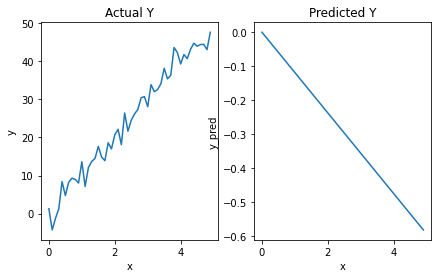

In [ ]:
# Write your code here ----------
X,y=load_data_LR()
W=get_linear_model(X, y)
y_pred=np.dot(X,W)
print("W:",W)
print("MSE:",MSE(y,y_pred))

fig,ax=plt.subplots(1,2,figsize=(7,4))
ax[0].set_title("Actual Y")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[0].plot(X,y)

ax[1].set_title("Predicted Y")
ax[1].set_xlabel("x")
ax[1].set_ylabel("y_pred")
ax[1].plot(X,y_pred)

  
# -------------------------------

##### Learn **W** using gradient descent method for following learning rates, `lr = [0.01, 0.001, 0.0001]` for **10 epochs**. Plot **MSE vs epochs** for each of them.  Also plot y_pred and y on different plots.

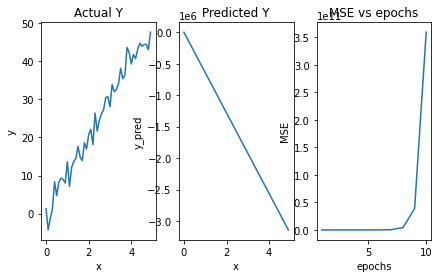

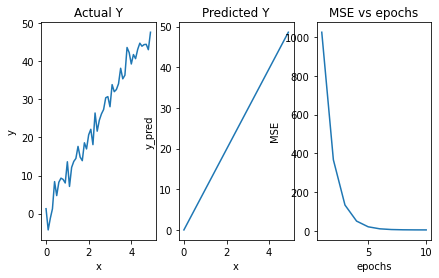

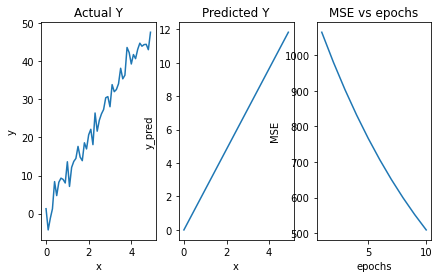

In [ ]:
# Write your code here ----------
lr=[0.01,0.001,0.0001]
X,y=load_data_LR()
for l in lr:
  epochs=10
  W,error_hist=train_by_GD(X, y, epochs, l)
  y_pred=np.dot(X,W)
  #print("W:",W)
  fig,ax=plt.subplots(1,3,figsize=(7,4))
  ax[0].set_title("Actual Y")
  ax[0].set_xlabel("x")
  ax[0].set_ylabel("y")
  ax[0].plot(X,y)

  ax[1].set_title("Predicted Y")
  ax[1].set_xlabel("x")
  ax[1].set_ylabel("y_pred")
  ax[1].plot(X,y_pred)
  
  epoch=np.array(range(1,epochs+1))
  ax[2].set_title("MSE vs epochs")
  ax[2].set_xlabel("epochs")
  ax[2].set_ylabel("MSE")
  ax[2].plot(epoch,error_hist)

# -------------------------------

## Question 2: Image Classification in Tensorflow using Deep Learning
To check whether you are able to build a given neural network model in tensorflow or not. First we will build a fully connected NN model second we will build a CNN model.

In [ ]:
import numpy as np
#import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
def plot_history(history):
  # function to plot accuracy vs epoch

  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')

In [ ]:
def load_data_cifar10_norm():
  # should return the normalised cifar10 dataset by loading it from tensorflow
  # link: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/

  # Write your code here ----------
  (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
  # -------------------------------
  x_train,x_test=x_train/255.0,x_test/255.0
  return x_train, y_train, x_test, y_test
#x_train, y_train, x_test, y_test=load_data_cifar10_norm()
#df=pd.DataFrame(x_train)
#df.describe()


### Define a fully connected neural network model with following attributes:

*   Total number of **hidden layers = 4**, all with **relu** activation
*   Number of neurons in **first hidden layer = 7200**
*   Number of neurons in **second hidden layer = 2304**
*   Number of neurons in **third hidden layer = 1024**
*   Number of neurons in **fourth hidden layer = 64**


In [ ]:
def build_fc_model(inp_shape=(32, 32, 3), num_class=10):
  # should return a sequential model defined based on the above attributes
  # do not compile the model

  # Write your code here ----------
  model=tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    #droput 50% of nodes
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(7200, activation='relu',input_shape=inp_shape),
                                    tf.keras.layers.Dense(2304, activation='relu'),
                                    tf.keras.layers.Dense(1024, activation='relu'),
                                    tf.keras.layers.Dense(64, activation='relu'),
                                    tf.keras.layers.Dense(num_class,activation='softmax')])
  # -------------------------------

  return model

### Define a CNN model with following attribute:

*   Total number of **hidden layer = 4**
*   After every convolutional layer there must be a MaxPoolingLayer of size (2, 2)
*   Total number of convolutional layer = 3, all with **relu** activation.
    *    Number of filters in **first convolutional layer = 32**
    *    Number of filters in **second convolutional layer = 64**
    *    Number of filters in **third convolutional layer = 64**
*   After all convolutional layer flatten the output and use **dense layer of 64 neurons**



In [ ]:
def build_cnn_model(inp_shape=(32, 32, 3), num_class=10):
  # should return a sequential model defined based on the above attributes
  # do not compile the model

  # Write your code here ----------
  model=tf.keras.models.Sequential([
                                     #first layer
                                     tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=inp_shape),
                                     tf.keras.layers.MaxPooling2D(2,2),
                                     #second layer
                                     tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                     tf.keras.layers.MaxPooling2D(2,2),
                                     #third layer
                                     tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                     tf.keras.layers.MaxPooling2D(2,2),
                                     #flatten
                                     tf.keras.layers.Flatten(),
                                     #fix dropout rate
                                     tf.keras.layers.Dropout(0.5),
                                     #neuron layer
                                     tf.keras.layers.Dense(64,activation='relu'),
                                     #output
                                     tf.keras.layers.Dense(num_class,activation='softmax') # to finally give output as one of the 10 class
                                     ])

  # -------------------------------

  return model

### Compile and train the fully connected neural network model using the above functions.

Epoch 1/10
98/98 [==============================] - 5s 44ms/step - loss: 5.1916 - accuracy: 0.1043 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
98/98 [==============================] - 4s 42ms/step - loss: 2.3026 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
98/98 [==============================] - 4s 43ms/step - loss: 2.3026 - accuracy: 0.0972 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
98/98 [==============================] - 4s 43ms/step - loss: 2.3026 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
98/98 [==============================] - 4s 43ms/step - loss: 2.3311 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
98/98 [==============================] - 4s 43ms/step - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3016 - val_accuracy: 0.1379
Epoch 7/10
98/98 [==============================] - 4s 42ms/step - loss: 2.3116 - accuracy: 0.1001 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 8/10
98

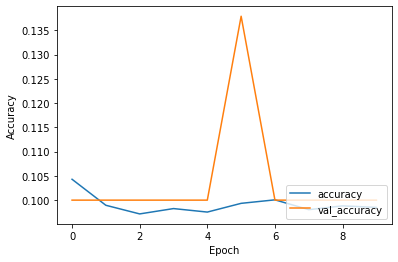

In [ ]:
# Write your code here ----------
x_train,y_train,x_test,y_test=load_data_cifar10_norm()
model=build_fc_model(inp_shape=(32, 32, 3), num_class=10)
#compile the model
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# -------------------------------

history = model.fit(x_train, y_train, epochs=10, batch_size=512,
                    validation_data=(x_test, y_test))

plot_history(history)
model.summary()

### Compile and train the CNN model using the above functions.

Epoch 1/10
98/98 [==============================] - 2s 20ms/step - loss: 2.0557 - accuracy: 0.2371 - val_loss: 1.8112 - val_accuracy: 0.3528
Epoch 2/10
98/98 [==============================] - 2s 16ms/step - loss: 1.7854 - accuracy: 0.3485 - val_loss: 1.5861 - val_accuracy: 0.4279
Epoch 3/10
98/98 [==============================] - 2s 16ms/step - loss: 1.6458 - accuracy: 0.4009 - val_loss: 1.5473 - val_accuracy: 0.4479
Epoch 4/10
98/98 [==============================] - 2s 16ms/step - loss: 1.5657 - accuracy: 0.4362 - val_loss: 1.3981 - val_accuracy: 0.4997
Epoch 5/10
98/98 [==============================] - 2s 16ms/step - loss: 1.4981 - accuracy: 0.4580 - val_loss: 1.3564 - val_accuracy: 0.5173
Epoch 6/10
98/98 [==============================] - 2s 16ms/step - loss: 1.4485 - accuracy: 0.4808 - val_loss: 1.3212 - val_accuracy: 0.5269
Epoch 7/10
98/98 [==============================] - 2s 16ms/step - loss: 1.3990 - accuracy: 0.4991 - val_loss: 1.3086 - val_accuracy: 0.5369
Epoch 8/10
98

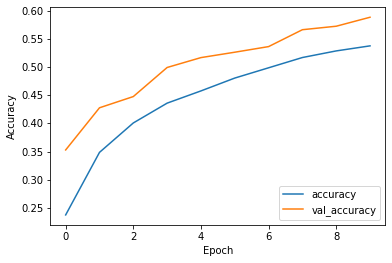

In [ ]:
# Write your code here ----------
x_train,y_train,x_test,y_test=load_data_cifar10_norm()
model=build_cnn_model(inp_shape=(32, 32, 3), num_class=10)
#compile
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# -------------------------------

history = model.fit(x_train, y_train, epochs=10, batch_size=512,
                    validation_data=(x_test, y_test))

plot_history(history)
model.summary()

### What do you observe? Compare both the model by looking at their Accuracy vs Epoch plot and total numbers of trainable parameters.

In [ ]:
print("Total number of trainable parameters used in FC model is more than 500 times of that used in CNN model. So CNN model requires less parameters to train in this case, and is faster\nFor FC model Accuracy change with each epoch is not smooth and is changing apdruptly, whereas for CNN model the accuracy is smoothly increasing with each epoch")

Total number of trainable parameters used in FC model is more than 500 times of that used in CNN model. So CNN model requires less parameters to train in this case, and is faster
For FC model Accuracy change with each epoch is not smooth and is changing apdruptly, whereas for CNN model the accuracy is smoothly increasing with each epoch
